# Unsupervised learning - PCA and clustering example notebook

## Exploring the data

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA
from pca import pca

from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

import warnings

warnings.filterwarnings('ignore')


In [198]:
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [139]:
#Understanding the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [140]:
df['Assault'] = df['Assault'].astype('float64')
df['UrbanPop'] = df['UrbanPop'].astype('float64')
df.dtypes


City         object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

In [141]:
print('Calculating any Missing values contained in the Dataframe: \n',df.isnull().sum())

Calculating any Missing values contained in the Dataframe: 
 City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


In [142]:
#Statisitical summary of the dataset
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [200]:
df2 = df.set_index('City')


City = df2.index
City

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='City')

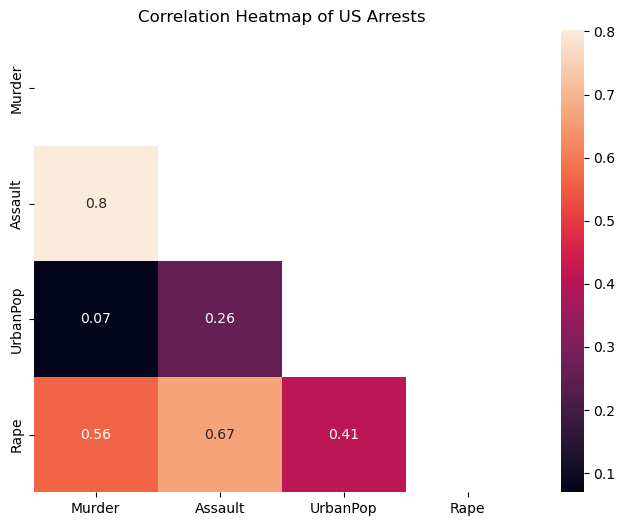

In [136]:
# Look at how our Data features correlate with one another

plt.figure(figsize=(8,6))
Arrest_corr = df.corr()

# mask mirrored side of heatmap
dropmirror = np.zeros_like(Arrest_corr)
dropmirror[np.triu_indices_from(dropmirror)]=True

sns.heatmap(Arrest_corr, annot=True, mask=dropmirror)
plt.title('Correlation Heatmap of US Arrests')
plt.show()


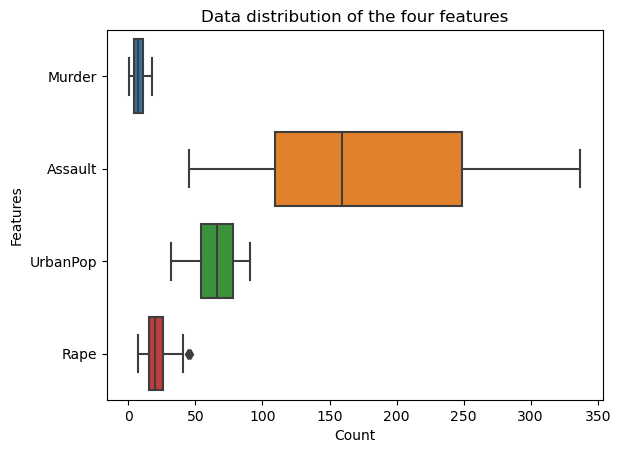

In [86]:
# Boxplot for feature distributions

sns.boxplot(data=df, orient='h')
plt.ylabel('Features')
plt.xlabel('Count')
plt.title('Data distribution of the four features')
plt.show()


We need to scale data in order to get accurate results

In [87]:
#select independent and standardize features

scaled = StandardScaler().fit_transform(df.iloc[:,1:5])

#create scaled version of Dataframe

df_scale = pd.DataFrame(scaled, columns = df.columns[1:5])
df_scale.head()


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [104]:
# Showing how each component attributes itself to the explained variance

Pca = PCA().fit(df_scale)

Pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Text(0.5, 1.0, 'Cumulative Explained Variance')

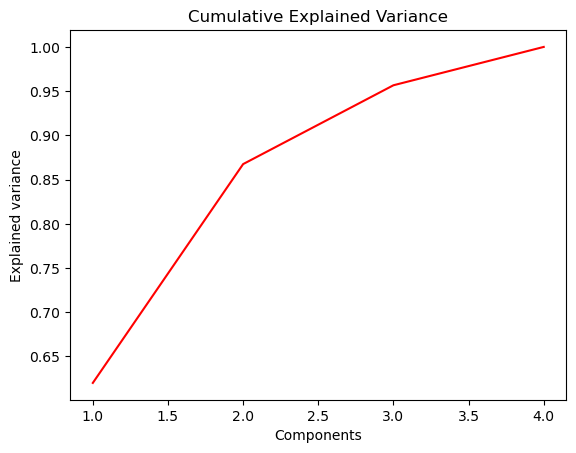

In [105]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(Pca.explained_variance_ratio_ )+1),
         np.cumsum(Pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

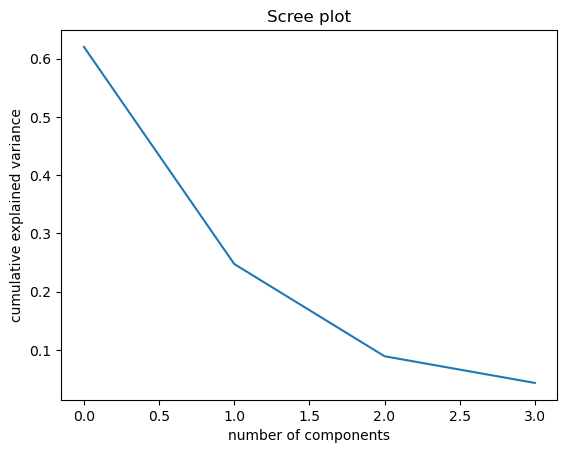

In [106]:
# Scree plot
plt.plot(Pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

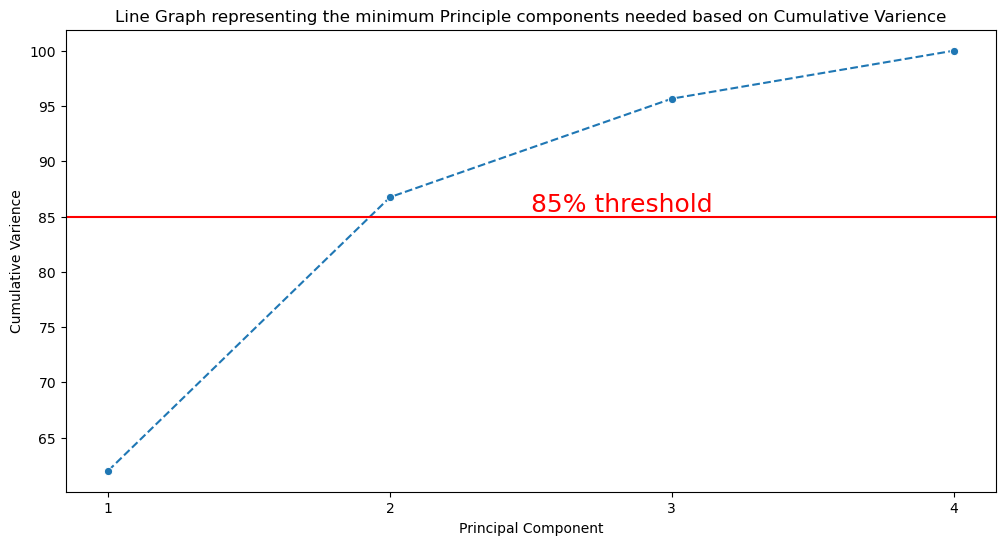

In [91]:
#Create a graph to show the minimum number of components needed for our analysis

X = np.arange(1, 5, step=1)

plt.figure(figsize=(12,6))
sns.lineplot(x=X, y=np.cumsum(Pca.explained_variance_ratio_)*100, linestyle='--', marker='o')

plt.title('Line Graph representing the minimum Principle components needed based on Cumulative Varience')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, 5, step=1))
plt.ylabel('Cumulative Varience')
plt.axhline(y=85, color='r', linestyle='-')
plt.text(2.5, 85.5, '85% threshold', color = 'red', fontsize=18)
plt.show()


We can proceed then with our analysis and work with 2 components

In [119]:
Pca = PCA(n_components = 2)

PC = Pca.fit_transform(df_scale)

PC.shape

(50, 2)

In [93]:
PC_df = pd.DataFrame(data = PC, columns = ['Principal Component 1', 'Principal Component 2'])

PC_df['City'] = df['City']

PC_df.head()


,Principal Component 1,Principal Component 2,City
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


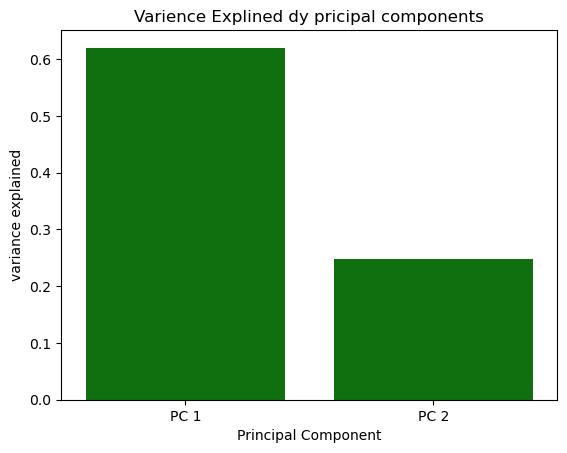

In [94]:
# Create a barplot to visually represent how each Component affects the varience

df = pd.DataFrame({'variance explained':Pca.explained_variance_ratio_, 'Principal Component': ['PC 1', 'PC 2']})

plt.title('Varience Explined dy pricipal components')
sns.barplot(x='Principal Component', y='variance explained', data=df, color='g')
plt.show()



[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


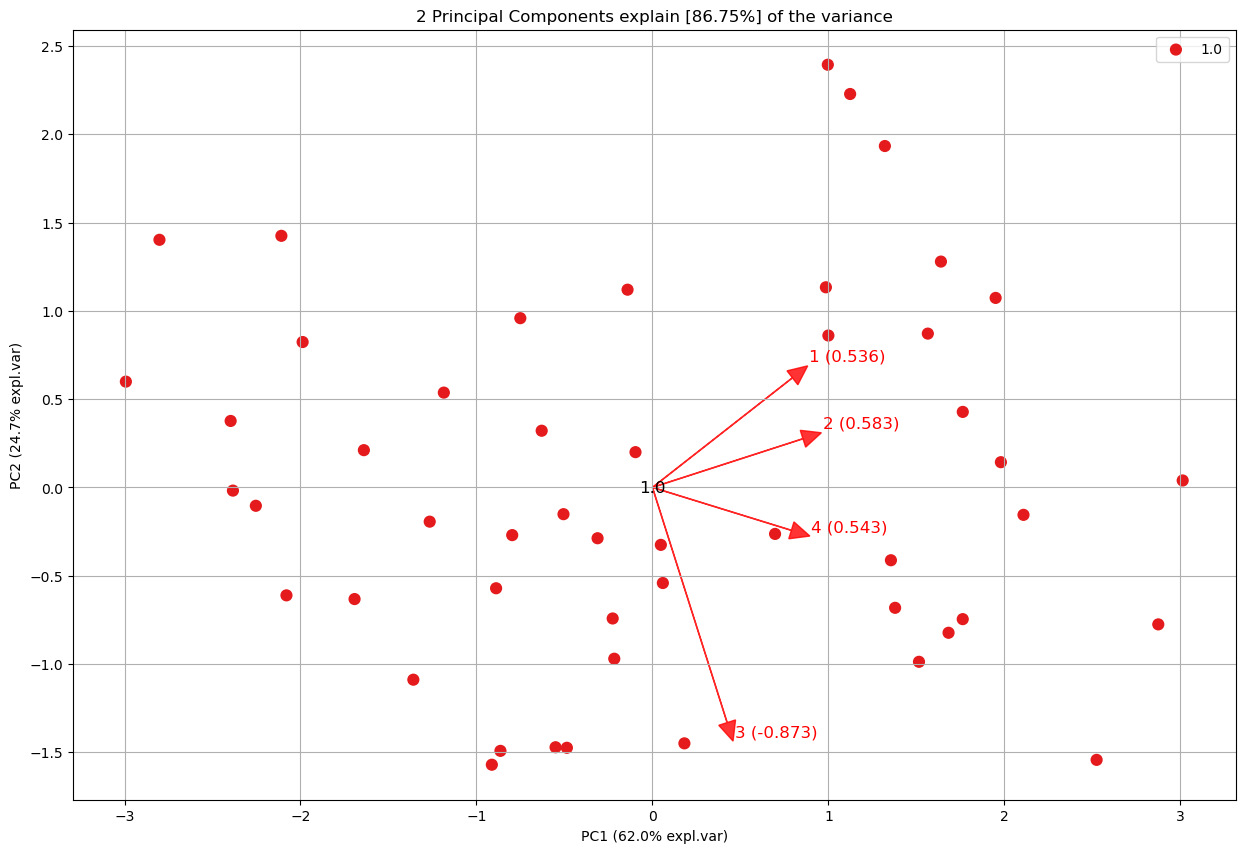

In [188]:
#Create biplot to represent Components within the total DataFrame
from pca import pca


model = pca(n_components=2)

results = model.fit_transform(scaled)

fig, ax =model.biplot(n_feat=4,)

The graph above shows the observations as points in the plane formed by two principal components. Samples are displayed as points, in our case, the different cities are all points on the biplot. Vectors indicate the different variables. Our data contained 4 variables all 4 are shown on the above graph.
Each Variable shown has had a positive correlation with the first Principle component. The component 'UrbanPop' denoted by 3 has a relaively higher correlation with the 2nd principle component. Additionally it is the only correlation which is negative

In [98]:
print(f"Proportion of Variance Explained: {Pca.explained_variance_ratio_}")

Proportion of Variance Explained: [0.62006039 0.24744129]


In [99]:
print(f"Cumulative Proportion: {np.cumsum(Pca.explained_variance_)}")

Cumulative Proportion: [2.53085875 3.5408232 ]


In [175]:
pca_df = pd.DataFrame(PC, index = df.index)
pca_df.head()

,0,1
City,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


## Hierarchical clustering


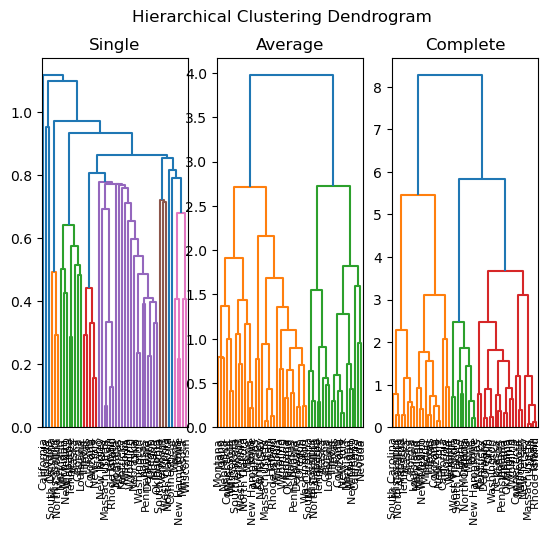

In [210]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)


Y = pdist(pca_df, 'cityblock')

  #plt.title("{} linkage based Dendograms".format(l))  
  #dend = dendrogram(linkage(Y, method=l)) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(Y, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(Y, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(Y, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

Using the complete linkage method and the cityblock for spatial distance the dentrogram is divided in 3 clusters

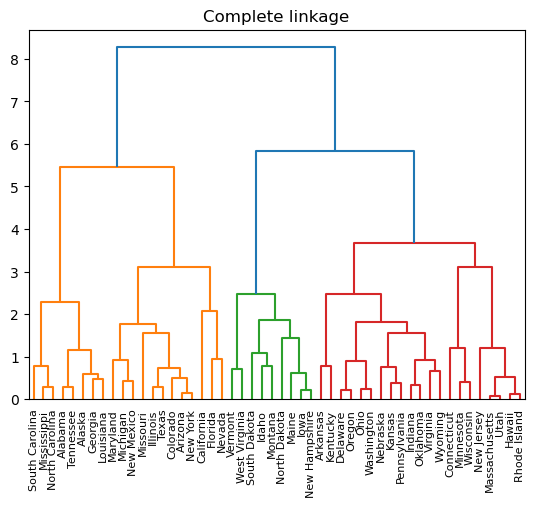

In [211]:
plt.title("Complete linkage")
dendrogram(linkage(Y, method='complete'), labels=pca_df.index)
plt.show()

K-means clustering

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3 as the dentrogram above. A visualisation of the clusters is shown in the figure below.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


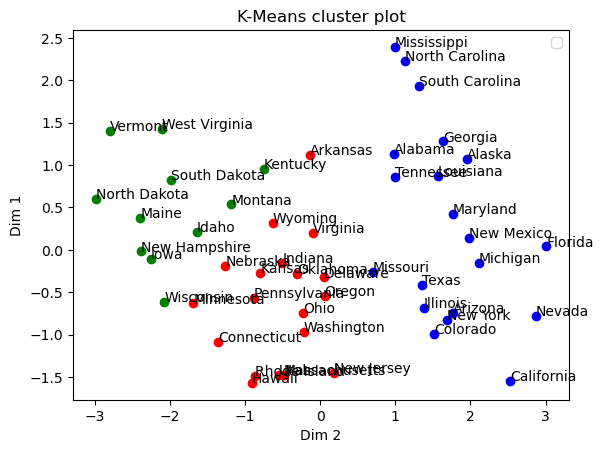

In [209]:
from sklearn.cluster import KMeans

# We extract the first two components
x = PC[:,0]
y = PC[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = City[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [212]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(City)[group0_indices]
group1 = np.array(City)[group1_indices]
group2 = np.array(City)[group2_indices]


print("Group 1: {}\n\n".format(group0))
print("Group 2: {}\n\n".format(group1))
print("Group 3: {}\n\n".format(group2))


Group 1: ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Indiana' 'Kansas'
 'Massachusetts' 'Minnesota' 'Nebraska' 'New Jersey' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'Utah' 'Virginia' 'Washington'
 'Wyoming']


Group 2: ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


Group 3: ['Idaho' 'Iowa' 'Kentucky' 'Maine' 'Montana' 'New Hampshire'
 'North Dakota' 'South Dakota' 'Vermont' 'West Virginia' 'Wisconsin']




It seems that there is an overlap between the K-mean and the chosen dendrogram in the clusters. The groups represent different  crime rates. The Cities in the Group-1 seems to be Safe-Zone, the Cities in Group-2 seems to have higher crime rates and can be regarded as Danger-Zone. The Cities in Group-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone
 